# Gender Classification Based on Voice - TMIT Voice Samples

### Presented by 
__Atanu Gayen__  
__Dipta Dutta__  
__S. Dananjay__  


#### About The Database
*TIMIT is a corpus of phonemically and lexically transcribed speech of American English speakers of different 
sexes and dialects. Each transcribed element has been delineated in time.
TIMIT was designed to further acoustic-phonetic knowledge and automatic speech recognition systems. 
It was commissioned by DARPA and corpus design was a joint effort between the Massachusetts Institute of 
Technology, SRI International, and Texas Instruments (TI). 
The speech was recorded at TI, transcribed at MIT, and verified and prepared for publishing by the 
National Institute of Standards and Technology (NIST).[1] There is also a telephone bandwidth version called 
NTIMIT (Network TIMIT).*

### Project Workflow

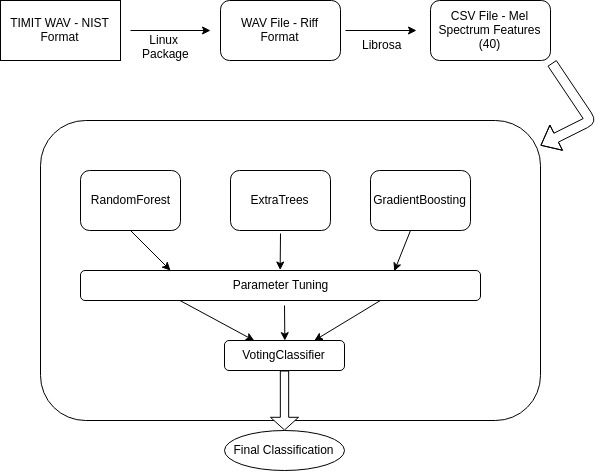

In [9]:
from IPython.display import Image
Image("/home/dananjay/Downloads/flowdiag.jpg")


__Preprocessing Code, written for sample files, for working proof of code,
original processing done in larger dataset
Below Snippet, to collect all audio files spread across multiple folders into one folder from root of TIMIT Database Folder
This snippet also helps us identify the gender of the audio file, based on the folder nomenclature__

In [ ]:
proj_dir = "/home/dananjay/Desktop/Workstation/AllProjects/audio_classification/sample_audio_files_original"
sub_fold = os.listdir(proj_dir)
r = re.compile(".*WAV")
wav_file_list = []
f = re.compile('F.*')
m = re.compile('M.*')
sub_fold[0]

for i in sub_fold:
    sub_sub_fold = os.listdir(os.path.join(proj_dir,i))
    print(sub_sub_fold)
    for j in sub_sub_fold:
        all_files = os.listdir(os.path.join(proj_dir,i,j))
        wav = filter(r.match,all_files)
        print(wav)
        for k in wav:
            wav_dir = os.path.join(proj_dir,i,j,k)
            wav_file_list.append(wav_dir)

"""
Output at this point is a list "wav_file_list" which has the location of the final wav file, in 
the following format 
['/home/dananjay/Desktop/Workstation/AllProjects/LDC93S1/timit/TIMIT/TEST/DR4/FREW0/SX20.WAV',
 '/home/dananjay/Desktop/Workstation/AllProjects/LDC93S1/timit/TIMIT/TEST/DR4/FREW0/SX110.WAV',
 '/home/dananjay/Desktop/Workstation/AllProjects/LDC93S1/timit/TIMIT/TEST/DR4/FREW0/SA1.WAV',
 '/home/dananjay/Desktop/Workstation/AllProjects/LDC93S1/timit/TIMIT/TEST/DR4/FREW0/SI1910.WAV',
 '/home/dananjay/Desktop/Workstation/AllProjects/LDC93S1/timit/TIMIT/TEST/DR4/FREW0/SI1030.WAV']
"""
"""
Below, we are copy pasting the file into a common location, and renaming the files.
"""
print(str(wav_file_list.__len__())+" number of files")
for i in wav_file_list:
    fname = str(i.split("/")[-2])+str(i.split("/")[-1])
    dest = os.path.join("/home/dananjay/Desktop/Workstation/AllProjects/LDC93S1/all_wavs_test/",fname)
    shutil.copyfile(i,dest)

"""
Converting WAV file format, to a .wav file format, which can be read by the librosa package. 
the above conversion was achieved using shell scripting commands, which were passed through python
"""
infolder = "/home/dananjay/Desktop/Workstation/AllProjects/LDC93S1/all_wavs_test/"
outfolder = "/home/dananjay/Desktop/Workstation/AllProjects/LDC93S1/test_converted/"
files = os.listdir(infolder)

for i in files:
    infile = os.path.join(infolder,i)
    outfile = os.path.join(outfolder,i.lower())
    command = "sndfile-convert -pcm32 "+infile+" "+outfile
    os.system(command)
"""
Feature Extraction using Librosa package
The below processing took approximately 3 hours to process (Train + Test Combined)
"""
data_path = '/home/dananjay/Desktop/Workstation/AllProjects/LDC93S1/test_converted/'
wavfiles = os.listdir(data_path)

tempdf = pd.DataFrame()
traindf = pd.DataFrame()
gender = []
Filename = []
ID = []
for wavfile in wavfiles:
    gender.append(wavfile[0][0])
    Filename.append(wavfile)

for i in range(len(gender)):
    ID.append(i)

len(ID)
trainf = {'ID': ID, 'Filename': Filename, 'Gender': gender}

traindf = pd.DataFrame(trainf)

traindf.to_csv("Audiotest.csv", index=False)

def parser(row):
    # function to load files and extract features
    file_name = os.path.join(data_path, str(row.Filename))
    try:
        # here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(
            y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    feature = mfccs
    label = row.Gender

    return [feature, label]


temp = traindf.apply(parser, axis=1)
temp.columns = ['feature', 'label']
new = temp.tolist()
try1 = pd.DataFrame(new)
try1.columns = ['feature', 'label']
try1.to_csv('csv_test_feature_clubbed.csv', index=False)

for i in range(40):
    cname = 'feature_' + str(i)
    try1[cname] = 0


for lc, v in enumerate(try1.feature):
    l_array = list(v)
    for colid, val in enumerate(l_array):
        colname = 'feature_' + str(colid)
        try1[colname].loc[lc] = val

try1.to_csv('csv_test_feature_not_clubbed.csv', index=False)


### Data Visualization

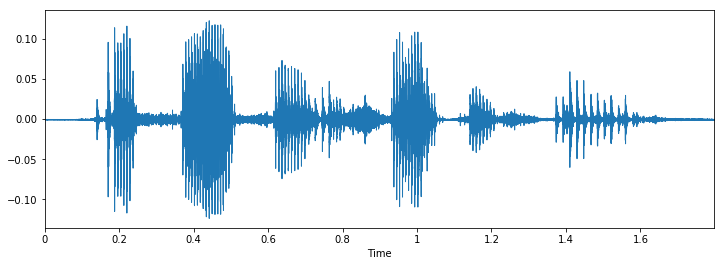

In [4]:
data_path = '/media/light/UbuntuDrive/Python_Code/Propython/Audio_data/train_converted'

maledata, sampling_rate_male = librosa.load(
    '/media/dananjay/Warehouse/AllProjects/LDC93S1/train_converted/mdas0sx21.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(maledata, sr=sampling_rate_male)


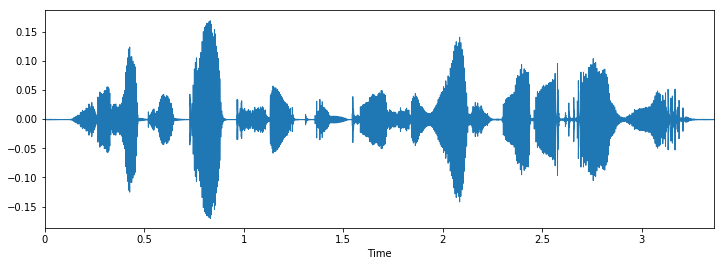

In [5]:
femaledata, sampling_rate_female = librosa.load(
    '/media/dananjay/Warehouse/AllProjects/LDC93S1/train_converted/faem0sa1.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(femaledata, sr=sampling_rate_female)


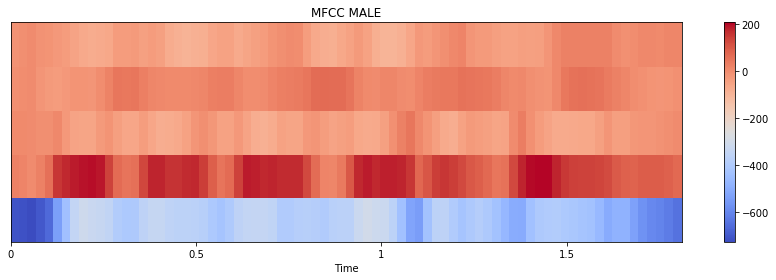

In [8]:
mfcc_male = librosa.feature.mfcc(y=maledata, sr=sampling_rate_male, n_mfcc=5)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc_male, x_axis='time')
plt.colorbar()
plt.title('MFCC MALE')
plt.tight_layout()


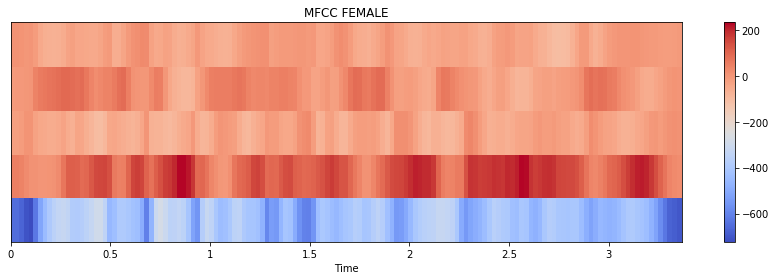

In [9]:
mfcc_female = librosa.feature.mfcc(
    y=femaledata, sr=sampling_rate_female, n_mfcc=5)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc_female, x_axis='time')
plt.colorbar()
plt.title('MFCC FEMALE')
plt.tight_layout()


### Audio Classification using Machine Learning Concepts
Using the librosa package detailed above,for our audio-files we took 40 MFCC’s for each file as the features for our dataset.


In [15]:
import pandas as pd
train_data = pd.read_csv("/media/dananjay/Warehouse/AllProjects/LDC93S1/csv_train_feature_not_clubbed.csv")
test_data = pd.read_csv('/media/dananjay/Warehouse/AllProjects/LDC93S1/csv_test_feature_not_clubbed.csv')

train_data.head(5)

,label,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39
0,f,-486.699527,106.149869,-51.975707,11.850106,-33.789773,-5.905454,-25.160825,-6.276888,3.161833,...,7.877805,9.329644,12.199990,10.462227,5.880949,4.498447,0.194543,0.942623,1.062830,1.367891
1,f,-559.048575,108.609556,-52.866682,34.838000,-29.340922,-2.333401,-23.661540,-1.157001,-6.975062,...,9.096295,12.871777,15.246263,14.945233,11.335555,7.263494,2.163350,3.046466,1.302863,0.662488
2,m,-457.383460,132.769523,-64.164321,23.750650,-19.971578,-25.930926,-10.468644,-8.213142,-16.939232,...,0.456053,-3.573759,-1.677023,-1.904021,-3.760206,-0.777999,-4.477384,-2.015355,-3.582728,-3.413906
3,m,-397.579230,114.148520,-53.662530,20.313326,-46.261971,12.294541,-16.512450,-19.776364,-2.844815,...,-4.986897,-2.031219,-3.549707,-3.157648,-4.274351,-4.576104,-2.877321,-5.592133,-3.657485,-2.850496
4,m,-443.585223,113.927026,-49.681568,20.197684,-19.596979,-7.307563,-16.559025,-11.092947,-14.875510,...,-1.049163,-2.381262,-1.890806,-2.148743,-3.054828,-1.073093,-3.575266,-2.551323,-2.770734,-3.432717


In [17]:
x_train = train_data.drop(columns=['label'])
y_train = train_data['label']
x_test = test_data.drop(columns =['label'])
y_test = test_data['label']

# Label Encoder, is used on the Label column, to convert Male and Female classification to 1 and 0.
# Standard Scaler - We also scaled all the numerical columns, and we also used it to compare the results by 
# classifying based on scaled data and unscaled data.

lenc = LabelEncoder()
scaler = StandardScaler()
y_train_enc = lenc.fit_transform(y_train)
y_test_enc = lenc.transform(y_test)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

print("Train Data Dimensions")
print(x_train.shape)

print("Test Data Dimensions")
print(x_test.shape)

Train Data Dimensions
(4620, 40)
Test Data Dimensions
(1680, 40)


__ALGORITHMS__  

__Random Forests__  
In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.

In contrast to the original publication, the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.


__Extremely Randomized Trees__  

In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

__Gradient Tree Boosting__  

Gradient Tree Boosting or Gradient Boosted Regression Trees (GBRT) is a generalization of boosting to arbitrary differentiable loss functions. GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems. Gradient Tree Boosting models are used in a variety of areas including Web search ranking and ecology.

The advantages of GBRT are:
* Natural handling of data of mixed type (= heterogeneous features)
* Predictive power
* Robustness to outliers in output space (via robust loss functions)

The disadvantages of GBRT are:
* Scalability, due to the sequential nature of boosting it can hardly be parallelized.
* The module sklearn.ensemble provides methods for both classification and regression via gradient boosted regression trees.

__Voting Classifier__  

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.


In [ ]:
# Defining Models 
rf_model = RandomForestClassifier(random_state=45,class_weight="balanced")
et_model = ExtraTreesClassifier(random_state=45,class_weight="balanced")
gb_model = GradientBoostingClassifier(random_state=45)

In [ ]:
# Parameter Grid for Parameter tuning of each of the models.

rf_grid = {'n_estimators':range(10,100,10),
           'criterion':['gini','entropy'],
           'max_features':[None,'sqrt','log2',10,15,20],
           'max_depth':[2,3,4,5]}

et_grid = {'n_estimators':range(10,100,10),
           'criterion':['gini','entropy'],
           'max_features':[None,'sqrt','log2',10,15,20],
           'max_depth':[2,3,4,5]}

gb_grid = {'loss':['deviance','exponential'],
           'learning_rate':[0.1,0.2,0.05,0.02,0.9],
           'n_estimators':[20,50,100,150],
           'max_features':[2,3,4,5]}

g1 = GridSearchCV(rf_model,param_grid=rf_grid,n_jobs=2,verbose=0,scoring="roc_auc")
g2 = GridSearchCV(gb_model,param_grid=gb_grid,n_jobs=2,verbose=0,scoring="roc_auc")
g3 = GridSearchCV(et_model,param_grid=et_grid,n_jobs=2,verbose=0,scoring="roc_auc")

all_models = [rf_model,et_model,gb_model]
all_grids = [g1,g2,g3]

In [ ]:
# Function to print Classification Metrics
def class_metrics(y_actual,predictions,datype):
    print("Confusion Matrix on {} Data".format(datype))
    print(confusion_matrix(y_actual,predictions))
    print("Classification Report on {} Data".format(datype))
    print(classification_report(y_actual,predictions))


# Function to run, the 3 ensemble models, one after the other
def run_all_models(trainx,trainy,testx,testy):
    for model in all_models:
        model.fit(trainx,trainy)
        print("Model Parameters Used")
        print(model)
        preds = model.predict(trainx)
        class_metrics(trainy,preds,"Train")
        preds2 = model.predict(testx)
        class_metrics(testy,preds2,"Test")

# Function to run the grid Search for each of the three ensemble models
def run_grid_all_models(trainx,trainy,testx,testy):
    for grid in all_grids:
        grid.fit(trainx,trainy)
        print("Best Estimator - Based on GridSearchCV")
        print(grid.best_estimator_)
        print("Scoring - AUC_ROC")
        print(grid.best_score_)
        pre = grid.predict(trainx)
        class_metrics(trainy,pre,"Train")
        pred = grid.predict(testx)
        class_metrics(testy,pred,"Test")

# Checking Performance on unscaled Data
run_all_models(x_train,y_train_enc,x_test,y_test_enc)

# Checking Performance on Scaled Data
run_all_models(x_train_scaled,y_train_enc,x_test_scaled,y_test_enc)        
        
# Grid for Unscaled Data
run_grid_all_models(x_train,y_train_enc,x_test,y_test_enc)

# Grid for Scaled Data
run_grid_all_models(x_train_scaled,y_train_enc,x_test_scaled,y_test_enc)


__Confusion Matrix - Of Different Models__

*Below is an output of the confusion matrices, of the different models, each row, is the algorithm used,
and each column represents, the combination of scaled X Variables vs Unscaled X Variables and Parameter Tuning vs Default model performance*

| unTuned –unScaled |               |   | unTuned –Scaled   |               |   | Tuned –unScaled   |               |   | Tuned – Scaled    |               |
|-------------------|---------------|---|-------------------|---------------|---|-------------------|---------------|---|-------------------|---------------|
|                                                                  __RandomForestClassifier__                                                               |
| 526               | 34            |   | 522               | 38            |   | 528               | 32            |   | 528               | 32            |
| 8                 | 1112          |   | 10                | 1110          |   | 12                | 1108          |   | 13                | 1107          |
| Ovr Acc           | 97.5          |   | Ovr Acc           | 97.1428571429 |   | Ovr Acc           | 97.380952381  |   | Ovr Acc           | 97.3214285714 |
|                   |               |   |                   |               |   |                   |               |   |                   |               |
|                   |               |   |                   |               |   |                   |               |   |                   |               |
|                                                               __GradientBoostingClassifier__                                                              |
| 531               | 29            |   | 531               | 29            |   | 531               | 29            |   | 528               | 32            |
| 9                 | 1111          |   | 9                 | 1111          |   | 9                 | 1111          |   | 10                | 1110          |
| Ovr Acc           | 97.7380952381 |   | Ovr Acc           | 97.7380952381 |   | Ovr Acc           | 97.7380952381 |   | Ovr Acc           | 97.5          |
|                   |               |   |                   |               |   |                   |               |   |                   |               |
|                                                                  __ExtraTreesClassifier__                                                                 |
| 530               | 30            |   | 529               | 31            |   | 535               | 25            |   | 532               | 28            |
| 13                | 1107          |   | 10                | 1110          |   | 14                | 1106          |   | 13                | 1107          |
| Ovr Acc           | 97.4404761905 |   | Ovr Acc           | 97.5595238095 |   | Ovr Acc           | 97.6785714286 |   | Ovr Acc           | 97.5595238095 |

### Performance on unscaled Data - Without Parameter Tuning


__Random Forest - Test Data__
 
| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.99   | 0.94     | 0.96    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.98   | 0.97     | 0.97    | 1680 |

__ExtraTrees Classifier - Test Data__

| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.95     | 0.96    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.97   | 0.97     | 0.97    | 1680 |

__XGBoost Classifier - Test Data__

| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.95     | 0.97    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.98   | 0.98     | 0.98    | 1680 |





### Performance on Scaled data - Without Parameter Tuning


__Random Forest - Test Data__

| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.93     | 0.96    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.97   | 0.97     | 0.97    | 1680 |

__ExtraTrees Classifier - Test Data__

| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.94     | 0.96    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.98   | 0.98     | 0.98    | 1680 |

__XGBoost Classifier - Test Data__

| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.95     | 0.97    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.98   | 0.98     | 0.98    | 1680 |


### Performance of Unscaled Data - Parameter Tuned

__Random Forest Model - Test Performance__

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=False, random_state=45,
            verbose=0, warm_start=False)
            
| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.94     | 0.96    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.97   | 0.97     | 0.97    | 1680 |


__XGBoost Classifier - Test Performance__

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='exponential', max_depth=3,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=45, subsample=1.0, verbose=0,
              warm_start=False)
              
| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.95     | 0.97    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.98   | 0.98     | 0.98    | 1680 |


__ExtraTrees Classifier - Test Performance__

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='entropy', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=45,
           verbose=0, warm_start=False)

| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.97   | 0.96     | 0.96    | 560  |
| 1           | 0.98   | 0.99     | 0.98    | 1120 |
| avg / total | 0.98   | 0.98     | 0.98    | 1680 |
           

### Performance of Scaled Data - Parameter Tuned

__Random Forest Model - Test Performance__

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=False, random_state=45,
            verbose=0, warm_start=False)
            
| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.94     | 0.96    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.97   | 0.97     | 0.97    | 1680 |


__XGBoost Classifier - Test Performance__

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='exponential', max_depth=3,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=45, subsample=1.0, verbose=0,
              warm_start=False)
              
| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.94     | 0.96    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.98   | 0.97     | 0.97    | 1680 |


__ExtraTrees Classifier - Test Performance__

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='entropy', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=45,
           verbose=0, warm_start=False)
           

| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.98     | 0.98    | 1360 |
| 1           | 0.99   | 0.99     | 0.99    | 3260 |
| avg / total | 0.99   | 0.99     | 0.99    | 4620 |
 



### Voting Classifier - Based on the three models

In [ ]:
vcf = VotingClassifier([('rf',g1.best_estimator_),
                        ('et',g2.best_estimator_),
                        ('gb',g3.best_estimator_)
                        ],
                       voting='soft')

vcf.fit(x_train_scaled,y_train_enc)

predictions = vcf.predict(x_test_scaled)
#print(classification_report(y_test_enc,predictions))
#print(confusion_matrix(y_test_enc,predictions))

__Final Performance - Voting Classifier__

| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.98   | 0.94     | 0.96    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.98   | 0.98     | 0.98    | 1680 |


__Confusion Matrix - Voting Classifier__

| Voting Classifier |               |   |
|-------------------|---------------|---|
| 529               | 31            |   |
| 10                | 1110          |   |
| Ovr Acc           | 97.5595238095 |   |

### Final Model Improvement Steps

*__Based on the three individual Grid Search Models, we took the feature importances of each of the columns. 
Top 20 columns, from each of the three models, and took the total unique number of columns. Using these
important columns, we re-ran the best models from each of the previous grid Searches, on the set of 24
predictors on unscaled Data__*

__Final List of Important Columns__

['feature_2', 'feature_26', 'feature_33', 'feature_30', 'feature_38', 'feature_31', 'feature_15', 'feature_34',
 'feature_27', 'feature_9', 'feature_37', 'feature_20', 'feature_4', 'feature_8', 'feature_12', 'feature_28',
 'feature_29', 'feature_25', 'feature_36', 'feature_39', 'feature_32', 'feature_23', 'feature_35', 'feature_0']

In [ ]:
rf1 = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='entropy', 
                             max_depth=5, max_features=15, max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
                             min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
                             oob_score=False, random_state=45, verbose=0, warm_start=False)

gb2 = GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=0.2, loss='exponential',
                                 max_depth=3, max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                 min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
                                 min_weight_fraction_leaf=0.0, n_estimators=150, presort='auto', 
                                 random_state=45, subsample=1.0, verbose=0, warm_start=False)

et3 = ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='entropy', max_depth=5, 
                           max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                           min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
                           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1, oob_score=False, 
                           random_state=45, verbose=0, warm_start=False)


final_vcf = VotingClassifier([
    ('rf',rf1),
    ('gb',gb2),
    ('et',et3)
],voting='hard')

final_vcf.fit(x_train_imp,y_train_enc)

new_preds = final_vcf.predict(x_test_imp)


__The final Voting classifier gave us an accuracy score as follows__

| precision   | recall | f1-score | support |      |
|-------------|--------|----------|---------|------|
| 0           | 0.99   | 0.95     | 0.97    | 560  |
| 1           | 0.97   | 0.99     | 0.98    | 1120 |
| avg / total | 0.98   | 0.98     | 0.98    | 1680 |

__Confusion Matrix__

|     |      |
|-----|------|
| 536 | 24   |
| 9   | 1111 |

__Overall Accuracy = 98.03% - This is an improvement over all the previous models, which were averagin around the 97.5% mark__

### In the section below, we plotted the partial dependency of all the important features for the target (here male/female) for the GradientBoost Model

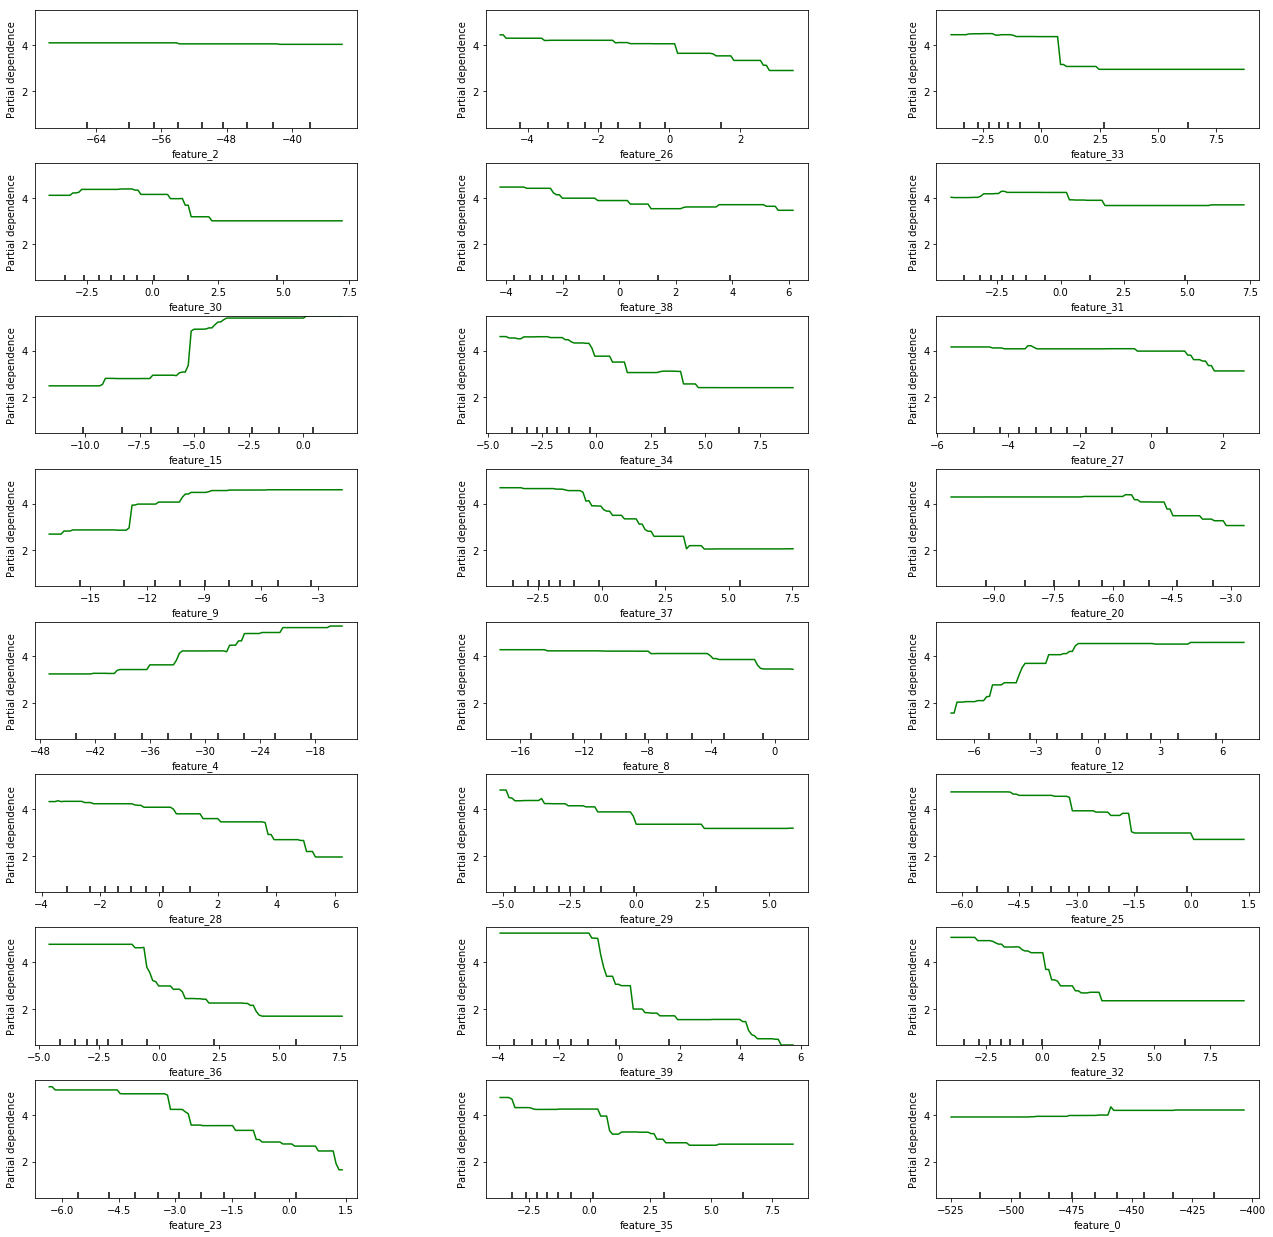

In [18]:
gb2 = GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=0.2, loss='exponential',
                                 max_depth=3, max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                 min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
                                 min_weight_fraction_leaf=0.0, n_estimators=150, presort='auto', 
                                 random_state=45, subsample=1.0, verbose=0, warm_start=False)

feature_names=['feature_2', 'feature_26', 'feature_33', 'feature_30', 'feature_38', 'feature_31', 'feature_15',
               'feature_34', 'feature_27', 'feature_9', 'feature_37', 'feature_20', 'feature_4', 'feature_8',
               'feature_12', 'feature_28', 'feature_29', 'feature_25', 'feature_36', 'feature_39', 'feature_32',
               'feature_23', 'feature_35', 'feature_0']

x_imp_train = x_train[feature_names]

gb2fit = gb2.fit(x_imp_train,y_train)

features = range(24)

fig,axs=plot_partial_dependence(gb2fit,x_imp_train,features=features,feature_names=feature_names)
fig.set_size_inches(20,30,forward = True)